# Evaluation

In [3]:
import sys
import numpy as np
import json
from tqdm import tqdm 
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sys.path.append("/Users/bobaebak/git/ai_text_detection")
sys.path.append("/mnt/data/bobae/ai_text_detection")

import models.openai_detector 
import models.openai_finetune_detector 
import models.radar_detector
import models.gptzero_detector
import models.detectgpt_detector
from utils.text_helper import tokenize_text
from utils.plot_helper import *

# Human Experiments

In [4]:
# loads a tofel dataset
with open('../dataset/human/eval_human.json', "r") as f:
    dataset = json.load(f)

### OpenAI Detector

In [ ]:
openai_detector = []

for i, data in enumerate(tqdm(dataset)):
    input = data['input']
    result = models.openai_detector.detect(input)
    openai_detector.append(result)
    
    if i%100 == 0:
        print(f"{i} index finished")
    
for item in openai_detector:
    item['Fake'] = str(item['Fake'])
    item['Real'] = str(item['Real'])

# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/h_openai_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(openai_detector, f, indent=4)

### OpenAI Detector Fine-tuned

In [3]:
openai_detector_2 = []

for i, data in enumerate(tqdm(dataset)):
    input = data['input']
    result = models.openai_finetune_detector.detect(input)
    openai_detector_2.append(result)
    
    if i%100 == 0:
        print(f"{i} index finished")

for item in openai_detector_2:
    item['Fake'] = str(item['Fake'])
    item['Real'] = str(item['Real'])        

# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/h_openai_finetuned_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(openai_detector_2, f, indent=4)

  0%|          | 0/192 [00:00<?, ?it/s]

/Users/bobaebak/anaconda3/envs/ai_detector/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
  1%|          | 1/192 [00:01<05:06,  1.60s/it]

0 index finished


 53%|█████▎    | 101/192 [01:40<01:26,  1.05it/s]

100 index finished


100%|██████████| 192/192 [03:07<00:00,  1.02it/s]

saved to /Users/bobaebak/git/ai_text_detection/dataset/eval/h_openai_finetuned_eval.json...


### Radar 

In [ ]:
radar = []

for i, data in enumerate(tqdm(dataset)):
    try:
        input = data['input']
        result = models.radar_detector.detect(input)
        radar.append(result)
        
        if i%100 == 0:
            print(f"{i} index finished")

    except Exception as e:
        print(e)

for item in radar:
    item['Fake'] = str(item['Fake'])
    item['Real'] = str(item['Real'])    

# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/h_radar_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(radar, f, indent=4)

### GPTZero

In [5]:
gptzero = []

for i, data in enumerate(tqdm(dataset)):
    try:
        input = data['input']
        result = models.gptzero_detector.detect(input)
        gptzero.append(result)
        
        if i%100 == 0:
            print(f"{i} index finished")

    except Exception as e:
        print(e)

    
# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/h_gptzero_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(gptzero, f, indent=4)

  1%|          | 1/192 [00:02<07:28,  2.35s/it]

0 index finished


 53%|█████▎    | 101/192 [02:57<02:39,  1.75s/it]

100 index finished


 73%|███████▎  | 141/192 [04:06<01:24,  1.66s/it]

[srcBuf length] > 0 INTERNAL ASSERT FAILED at "/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/OperationUtils.mm":341, please report a bug to PyTorch. Placeholder tensor is empty!


100%|██████████| 192/192 [05:49<00:00,  1.82s/it]

[srcBuf length] > 0 INTERNAL ASSERT FAILED at "/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/OperationUtils.mm":341, please report a bug to PyTorch. Placeholder tensor is empty!
saved to /Users/bobaebak/git/ai_text_detection/dataset/eval/h_gptzero_eval.json...


### DetectGPT

In [5]:
detectgpt = []

for i, data in enumerate(tqdm(dataset)):
    try:
        input = data['input']
        result = models.detectgpt_detector.detect(input)
        detectgpt.append(result)
        
        if i%100 == 0:
            print(f"{i} index finished")
    except Exception as e:
        print(e)
    
# save as json file
# file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/h_detectgpt_eval.json')
file_path = "".join('/mnt/data/bobae/ai_text_detection/dataset/eval/h_detectgpt_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(detectgpt, f, indent=4)

  0%|                                                                                                                                                                                         | 0/192 [00:00<?, ?it/s]You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  1%|▉                                                                                                                                                                                | 1/192 [00:08<26:53,  8

0 index finished


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  6%|██████████                                                                                                                                                                      | 11/192 [01:07<16:37,  5.51s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  7%|████████████▊                                                                                                                                                                   | 14/192 [01:34<25:18,  8.53s/it]

CUDA out of memory. Tried to allocate 76.00 MiB. GPU 


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 85/192 [08:37<10:09,  5.70s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 53%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 101/192 [10:12<09:04,  5.99s/it]

100 index finished


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 58%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 111/192 [11:09<07:20,  5.44s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 137/192 [13:43<06:46,  7.40s/it]

CUDA out of memory. Tried to allocate 54.00 MiB. GPU 


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 172/192 [17:10<01:47,  5.39s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 191/192 [19:01<00:05,  5.25s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 192/192 [19:06<00:00,  5.97s/it]

saved to /mnt/data/bobae/ai_text_detection/dataset/eval/h_detectgpt_eval.json...


# AI Experiments

In [7]:
with open('../dataset/ai/eval_gpt35.json', "r") as f:
    dataset = json.load(f)

### OpenAI Detector

In [ ]:
openai_detector = []

for i, data in enumerate(tqdm(dataset)):
    input = data['input']
    result = models.openai_detector.detect(input)
    openai_detector.append(result)
    
    if i%100 == 0:
        print(f"{i} index finished")
    
for item in openai_detector:
    item['Fake'] = str(item['Fake'])
    item['Real'] = str(item['Real'])

# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/m_openai_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(openai_detector, f, indent=4)

### OpenAI Detector Fine-tuned

In [5]:
openai_detector_2 = []

for i, data in enumerate(tqdm(dataset)):
    input = data['input']
    result = models.openai_finetune_detector.detect(input)
    openai_detector_2.append(result)
    
    if i%100 == 0:
        print(f"{i} index finished")

for item in openai_detector_2:
    item['Fake'] = str(item['Fake'])
    item['Real'] = str(item['Real'])        

# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/m_openai_finetuned_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(openai_detector_2, f, indent=4)

  1%|          | 1/192 [00:01<05:31,  1.73s/it]

0 index finished


 53%|█████▎    | 101/192 [01:41<01:26,  1.06it/s]

100 index finished


100%|██████████| 192/192 [03:10<00:00,  1.01it/s]

saved to /Users/bobaebak/git/ai_text_detection/dataset/eval/m_openai_finetuned_eval.json...


### Radar

In [6]:
radar = []

for i, data in enumerate(tqdm(dataset)):
    input = data['input']
    result = models.radar_detector.detect(input)
    radar.append(result)
    
    if i%100 == 0:
        print(f"{i} index finished")

for item in radar:
    item['Fake'] = str(item['Fake'])
    item['Real'] = str(item['Real'])    

# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/m_radar_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(radar, f, indent=4)

  1%|          | 1/192 [00:04<13:38,  4.29s/it]

0 index finished


 53%|█████▎    | 101/192 [04:32<04:03,  2.68s/it]

100 index finished


100%|██████████| 192/192 [08:41<00:00,  2.72s/it]

saved to /Users/bobaebak/git/ai_text_detection/dataset/eval/m_radar_eval.json...


### GPTZero

In [4]:
gptzero = []

for i, data in enumerate(tqdm(dataset)):
    input = data['input']
    result = models.gptzero_detector.detect(input)
    gptzero.append(result)
    
    if i%100 == 0:
        print(f"{i} index finished")
    
# save as json file
file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/m_gptzero_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(gptzero, f, indent=4)

  1%|          | 1/192 [00:02<08:53,  2.79s/it]

0 index finished


 53%|█████▎    | 101/192 [03:09<02:49,  1.86s/it]

100 index finished


100%|██████████| 192/192 [05:52<00:00,  1.83s/it]

saved to /Users/bobaebak/git/ai_text_detection/dataset/eval/m_gptzero_eval.json...


### DetectGPT

In [8]:
detectgpt = []

for i, data in enumerate(tqdm(dataset)):
    try:
        input = data['input']
        result = models.detectgpt_detector.detect(input)
        detectgpt.append(result)
        
        if i%100 == 0:
            print(f"{i} index finished")
    except Exception as e:
        print(e)
    
# save as json file
# file_path = "".join('/Users/bobaebak/git/ai_text_detection/dataset/eval/m_detectgpt_eval.json')
file_path = "".join('/mnt/data/bobae/ai_text_detection/dataset/eval/m_detectgpt_eval.json')
print(f"saved to {file_path}...")
with open(file_path, "w") as f:
    json.dump(detectgpt, f, indent=4)

  1%|▉                                                                                                                                                                                | 1/192 [00:06<19:36,  6.16s/it]

0 index finished


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  6%|██████████                                                                                                                                                                      | 11/192 [01:03<17:00,  5.64s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
  7%|████████████▊                                                                                                                                                                   | 14/192 [01:18<15:01,  5.07s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 30%|████████████████████████████████████████████████████▎                                                                                                                           | 57/192 [05:19<11:38,  5.18s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 44%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 85/192 [08:07<09:50,  5.52s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 53%|████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 101/192 [09:40<08:45,  5.77s/it]

100 index finished


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 55%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 105/192 [10:00<07:25,  5.12s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 172/192 [16:18<01:38,  4.93s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 173/192 [16:22<01:28,  4.67s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 183/192 [17:20<00:47,  5.32s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 191/192 [18:06<00:05,  5.17s/it]

division by zero


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 192/192 [18:11<00:00,  5.69s/it]

saved to /mnt/data/bobae/ai_text_detection/dataset/eval/m_detectgpt_eval.json...


# Evaluation Plot

### OpenAI Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


OpenAI & 0.53 & 0.52 & 0.96 & 0.67 & 0.10 & 0.53


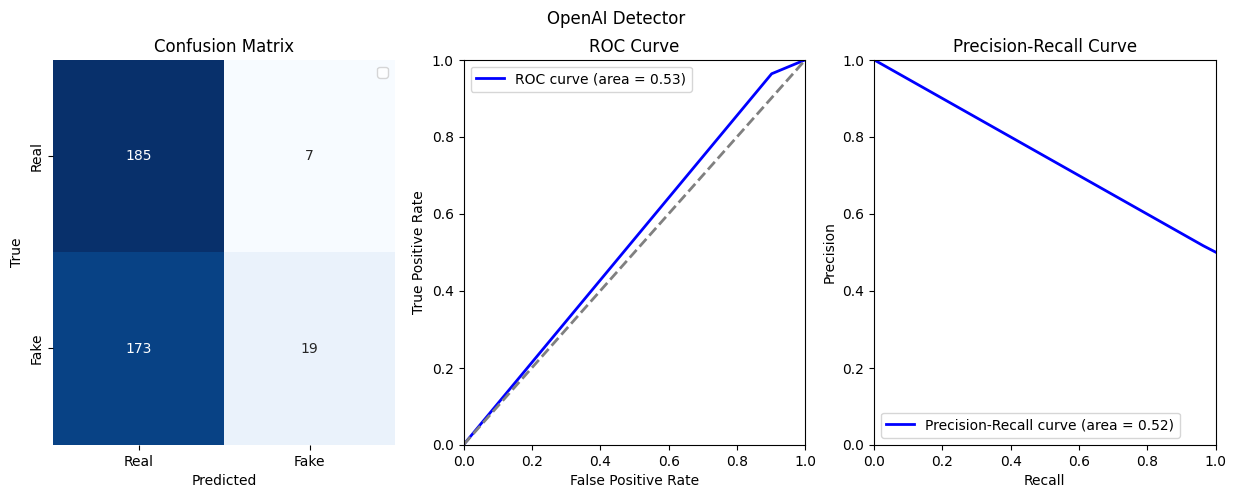

In [3]:
# Load the datasets
with open('../dataset/eval/h_openai_eval.json', "r") as f:
    eval_openai_detector = json.load(f)
    for item in eval_openai_detector:
        item['label'] = 'Real'

with open('../dataset/eval/m_openai_eval.json', "r") as f:
    eval_openai_detector.extend(json.load(f))
    for item in eval_openai_detector:
        if "label" not in item:
            item['label'] = 'Fake'

true_labels = [item['label'] for item in eval_openai_detector]
predicted_labels = []
for prob in eval_openai_detector:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [1 if label == 'Real' else 0 for label in predicted_labels]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="OpenAI Detector",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Sum the diagonal elements (true positives + true negatives)
correct_predictions = np.trace(conf_matrix)

# Sum all elements in the confusion matrix
total_predictions = np.sum(conf_matrix)

# Methods & Accuracy & Precision & Recall & F1 & Specificity & AUC
accuracy = accuracy_score(true_binary, predicted_binary)
precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)
f1 = f1_score(true_binary, predicted_binary)
tn, fp, fn, tp = confusion_matrix(true_binary, predicted_binary).ravel()
specificity = tn / (tn + fp)
auc_score = roc_auc

print(f"OpenAI & {accuracy:.2f} & {precision:.2f} & {recall:.2f} & {f1:.2f} & {specificity:.2f} & {roc_auc:.2f}")

### OpenAI Fine-tuned Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


OpenAI Fine-tuned & 0.94 & 0.92 & 0.96 & 0.94 & 0.92 & 0.94


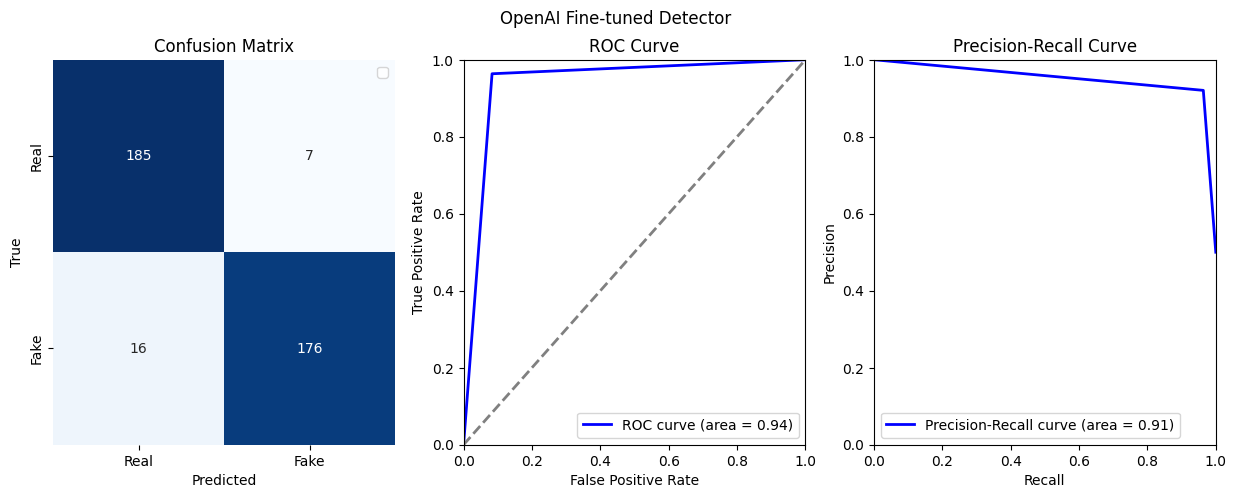

In [4]:
# Load the datasets
with open('../dataset/eval/h_openai_finetuned_eval.json', "r") as f:
    eval_openai_detector = json.load(f)
    for item in eval_openai_detector:
        item['label'] = 'Real'

with open('../dataset/eval/m_openai_finetuned_eval.json', "r") as f:
    eval_openai_detector.extend(json.load(f))
    for item in eval_openai_detector:
        if "label" not in item:
            item['label'] = 'Fake'

true_labels = [item['label'] for item in eval_openai_detector]
predicted_labels = []
for prob in eval_openai_detector:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [1 if label == 'Real' else 0 for label in predicted_labels]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="OpenAI Fine-tuned Detector",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Methods & Accuracy & Precision & Recall & F1 & Specificity & AUC
accuracy = accuracy_score(true_binary, predicted_binary)
precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)
f1 = f1_score(true_binary, predicted_binary)
tn, fp, fn, tp = confusion_matrix(true_binary, predicted_binary).ravel()
specificity = tn / (tn + fp)
auc_score = roc_auc

print(f"OpenAI Fine-tuned & {accuracy:.2f} & {precision:.2f} & {recall:.2f} & {f1:.2f} & {specificity:.2f} & {roc_auc:.2f}")

### RADAR Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Radar & 0.51 & 1.00 & 0.02 & 0.03 & 1.00 & 0.51


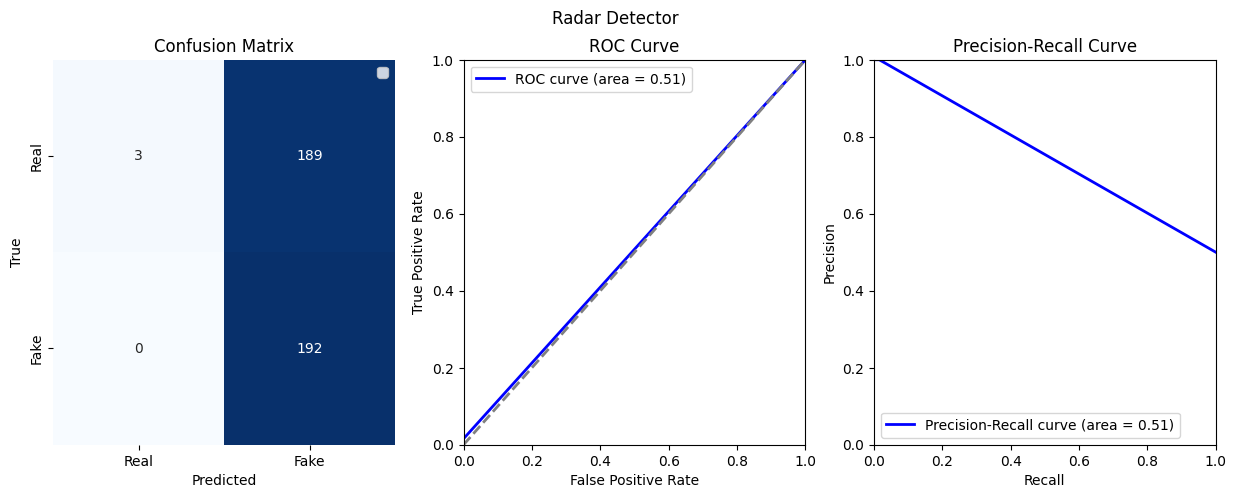

In [5]:
# Load the datasets
with open('../dataset/eval/h_radar_eval.json', "r") as f:
    eval_radar = json.load(f)
    for item in eval_radar:
        item['label'] = 'Real'

with open('../dataset/eval/m_radar_eval.json', "r") as f:
    eval_radar.extend(json.load(f))
    for item in eval_radar:
        if "label" not in item:
            item['label'] = 'Fake'

# Process the first dataset
true_labels = [item['label'] for item in eval_radar]
predicted_labels = []
for prob in eval_radar:
    fake_prob = float(prob['Fake'])
    real_prob = float(prob['Real'])
    if real_prob > fake_prob:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [1 if label == 'Real' else 0 for label in predicted_labels]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="Radar Detector",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Methods & Accuracy & Precision & Recall & F1 & Specificity & AUC
accuracy = accuracy_score(true_binary, predicted_binary)
precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)
f1 = f1_score(true_binary, predicted_binary)
tn, fp, fn, tp = confusion_matrix(true_binary, predicted_binary).ravel()
specificity = tn / (tn + fp)
auc_score = roc_auc

print(f"Radar & {accuracy:.2f} & {precision:.2f} & {recall:.2f} & {f1:.2f} & {specificity:.2f} & {roc_auc:.2f}")

### GPTZero Detector

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


GPTZero & 0.74 & 0.71 & 0.82 & 0.76 & 0.66 & 0.74


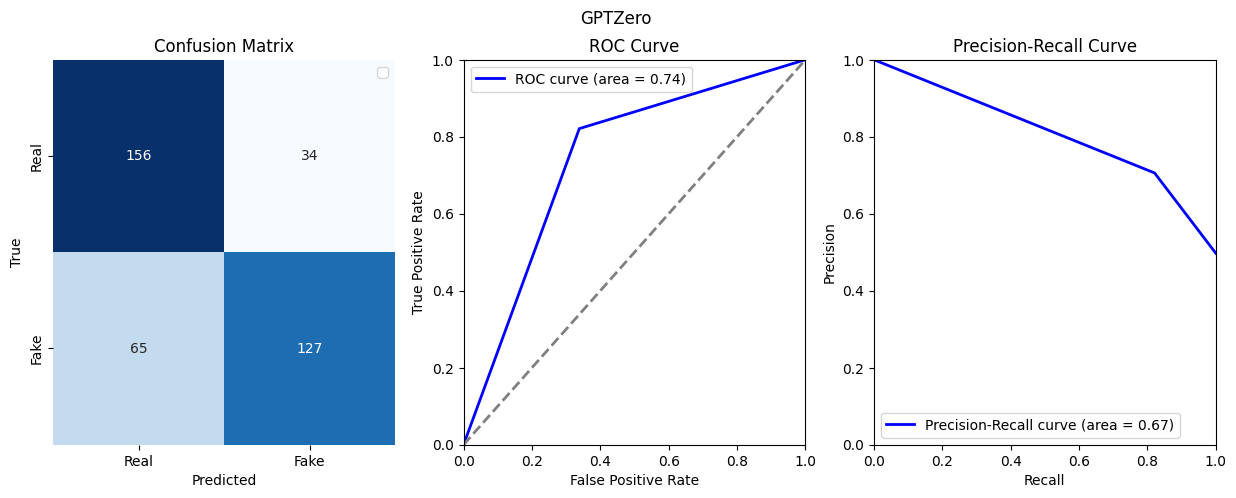

In [6]:
# Load the datasets
with open('../dataset/eval/h_gptzero_eval.json', "r") as f:
    eval_gptzero = json.load(f)
    for item in eval_gptzero:
        item['rlabel'] = 'Real'
        
with open('../dataset/eval/m_gptzero_eval.json', "r") as f:
    eval_gptzero.extend(json.load(f))
    for item in eval_gptzero:
        if "rlabel" not in item:
            item['rlabel'] = 'Fake'

# Process the first dataset
true_labels = [item['rlabel'] for item in eval_gptzero]
predicted_labels = []
for prob in eval_gptzero:
    if prob['label'] == 1:
        predicted_labels.append('Real')
    else:
        predicted_labels.append('Fake')

# calculate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=['Real', 'Fake'])

# calculate ROC Curve
true_binary = [1 if label == 'Real' else 0 for label in true_labels]
predicted_binary = [item['label'] for item in eval_gptzero]
fpr, tpr, thresholds = roc_curve(true_binary, predicted_binary)
roc_auc = auc(fpr, tpr)

# calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_binary, predicted_binary)
average_precision = average_precision_score(true_binary, predicted_binary)

#### Plot both confusion matrices side by side
helper = PlotHelper(
    col=3, figsize=(15, 5), title="GPTZero",
    plots=[
        PlotItem(
            ptype="heatmap", xlabel='Predicted', ylabel='True', title='Confusion Matrix',
            x=[conf_matrix],
            args=[{"annot": True, "fmt":'d', "cbar":False, "cmap":'Blues', "xticklabels":['Real', 'Fake'], "yticklabels":['Real', 'Fake']}],
        ),
        PlotItem(
            ptype="plot", xlabel="False Positive Rate", ylabel="True Positive Rate", title="ROC Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[fpr, [0,1]],
            y=[tpr, [0,1]],
            args=[{"color":"blue", "lw":2, "label":'ROC curve (area = %0.2f)' % roc_auc}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
        PlotItem(
            ptype="plot", xlabel="Recall", ylabel="Precision", title="Precision-Recall Curve",
            xlim=(0.0, 1.0), ylim=(0.0, 1.0),
            x=[recall, [1,1]],
            y=[precision, [1,1]],
            args=[{"color":"blue", "lw":2, "label":'Precision-Recall curve (area = %0.2f)' % average_precision}, {"color": "grey", "lw":2, "linestyle": "--"}]
        ),
    ]
)

draws(helper)

# Methods & Accuracy & Precision & Recall & F1 & Specificity & AUC
accuracy = accuracy_score(true_binary, predicted_binary)
precision = precision_score(true_binary, predicted_binary)
recall = recall_score(true_binary, predicted_binary)
f1 = f1_score(true_binary, predicted_binary)
tn, fp, fn, tp = confusion_matrix(true_binary, predicted_binary).ravel()
specificity = tn / (tn + fp)
auc_score = roc_auc

print(f"GPTZero & {accuracy:.2f} & {precision:.2f} & {recall:.2f} & {f1:.2f} & {specificity:.2f} & {roc_auc:.2f}")

### DetectGPT

### GAN